In [2]:
# Efficient numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Alternative statistics package.
import statsmodels.stats.weightstats as stat

# Mains statistics package.
import scipy.stats as ss

# Plotting.
import matplotlib.pyplot as plt

# Fancier plotting.
import seaborn as sns

from sklearn import datasets

In [3]:
iris = datasets.load_iris()

In [12]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [35]:
# isolates an indivual element of 2 classes
a = iris.data[:50,0]
b = iris.data[50:100,0]
c = iris.data[100:150,0]

# Stick both samples in one data frame.
df = pd.DataFrame({'Category': ['setosa'] * len(a) + ['versicolor'] * len(b), 'Value': np.hstack([a,b])})

# printes the list of numbers
df

,Category,Value
0,setosa,5.1
1,setosa,4.9
2,setosa,4.7
3,setosa,4.6
4,setosa,5.0
...,...,...
95,versicolor,5.7
96,versicolor,5.7
97,versicolor,6.2
98,versicolor,5.1


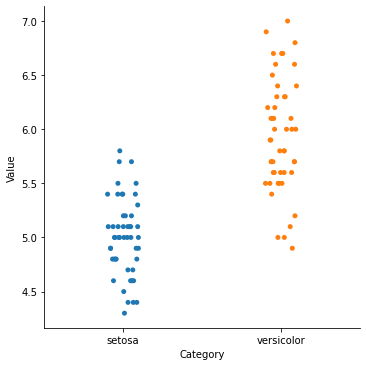

In [29]:
# creates a catplot with seaborn
sns.catplot(x='Category', y='Value', jitter=True, data=df);

In [31]:
# The scipy.stats version.
t_ss, p_ss = ss.ttest_ind(a, b)
print(f"t-value: {t_ss}\tp-value: {p_ss}")
print(f"P_scipy: {p_ss:0.2f}")

t-value: -10.52098626754911	p-value: 8.985235037487079e-18
P_scipy: 0.00


In [32]:
# The statsmodels version.
t_sm, p_sm, d_sm = stat.ttest_ind(a, b)
print(f"t-value: {t_sm}\tp-value: {p_sm}\tDeg Free: {d_sm}")
print(f"P_statsmodels: {p_sm:0.2f}")

t-value: -10.5209862675491	p-value: 8.985235037487594e-18	Deg Free: 98.0
P_statsmodels: 0.00


## Anova

In [37]:
# ANOVA can be used to avoid a higher Type I error rate.
F, P = ss.f_oneway(a, b, c)
print(f"{P:.2f}")

0.00
